#                                      ====== Stroke Prediction Model ======


# 1. Introduction

Pada Notebook ini saya akan mencoba untuk membuat prediksi apakah seseorang dengan kondisi kesehatan tertentu mengidap stroke atau tidak. Ini adalah project kedua saya dalam mencoba model klasifikasi. Notebook ini akan dibagi menjadi beberapa bagian :
1. Introduction
2. Data Preprocessing
3. Modeling
4. Model Tuning
5. Deployment
6. Conclusion



Berdasarkan wikipedia stroke adalah kondisi kesehatan dimana alirah darah ke otak melemah dan menyebabkan sel - sel pada otak mati (wikipedia.com). Sayangnya, tidak ada obat saat ini untuk menyembuhkan struk. Tapi menurut dokter dan ahli kesehatan mereka sepakat bahwa pencegahan dapat dilakukan dengan mengidentifikasi gejala - gejala stroke dini yang dimiliki seseorang. Dengan bantuan machine learning saya aka mencoba membuat model terbaik dari dataset dengan 5110 pasien dengan 10 kondisi kesehatan yang berbeda - beda untuk memprediksi kemungkinan Stroke pada seseorang berdasarkan kondisi kesehatan yang dimiliki.

In [1]:
# import basic library
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from datetime import date
from scipy import stats
import lux

In [2]:
# Load dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Melihat info dari dataset seperti jumlah kolom, input, type data, dan memori
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Melihat apakah ada missing value dalam dataset
data.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Sebagian besar dataset kita tidak ada missing value, namun perlu kita cek satu persatu kolom apakah ada miss interpretasi atau salah input.

# 2. Data Preprocessing

## 2.1 Handling Variabel

Pada bagian ini kita akan melakukan penanganan pada tiap variabel atau kolom pada dataset, seperti handling missing value, melihat distribusi pada tiap kolom, dan EDA pada tiap kolom

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 1.0, 'Age Distribution')

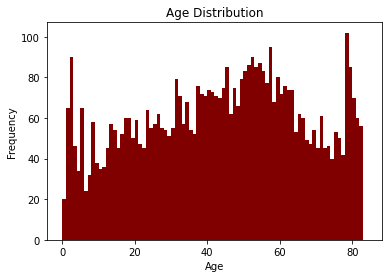

In [6]:
# Karena type data age adalah float tapi tidak memungkinkan umur berbentuk desimal,
# maka kita akan mengubah menjadi integer dengan pembulatan
data.age = data.age.round().astype('int')
print(data.age.describe())
# melihat distribusi kolom age
bin_list = list(range(0,85,1))
plt.hist(x=data.age,bins=bin_list,color='maroon')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

No     4612
Yes     498
dtype: int64



<ipython-input-7-441414c3c956>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

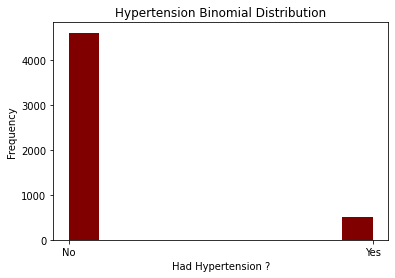

In [7]:
# kolom Hypertension merupakan kolom kategori yang berisi True or False value, True = 1, False = 0
hypertension = data.hypertension.replace({0:'No',1:'Yes'})
print(hypertension.value_counts())
plt.hist(x= hypertension,color='maroon')
plt.title('Hypertension Binomial Distribution')
plt.xlabel('Had Hypertension ?')
plt.ylabel('Frequency')

No     4834
Yes     276
dtype: int64



<ipython-input-8-277c0d080978>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

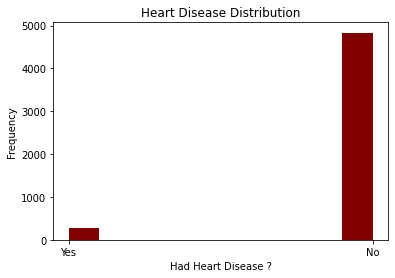

In [8]:
# kolom heart_disease juga kolom kategori, kita akan mengganti 0 = No dan 1 = Yes
heart_disease = data.heart_disease.replace({0:'No',1:'Yes'})
print(heart_disease.value_counts())
plt.hist(x=heart_disease,color='maroon')
plt.title('Heart Disease Distribution')
plt.xlabel('Had Heart Disease ?')
plt.ylabel('Frequency')

In [9]:
# dari grafik di atas dapat dilihat bahwa kolom hypertension dan heart_disease
# memiliki hubungan, kita akan membandingkan kedua kolom tersebut
compare = pd.DataFrame()
compare = data.loc[(data['hypertension'] != data['heart_disease'])]
compare

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

dari perbandingan di atas terdapat 646 pasien yang kondisi hipertensi dan heart disease nya berlawanan satu sama lain (apabila pasien mengidap hipertensi pasien tersebut tidak mengidap heart disease). sebagain besar pasien (4464 pasien) memiliki kondisi hupertensi dan heart disease yang searah (apabila pasien mengidap hipertensi pasien tersebut mengidap heart disease juga).
Maka dapat kita simpulkan bahwa korelasi antara hipertensi dan heart disease positif atau searah.

Yes    3353
No     1757
dtype: int64



<ipython-input-10-8de0ad70bf47>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

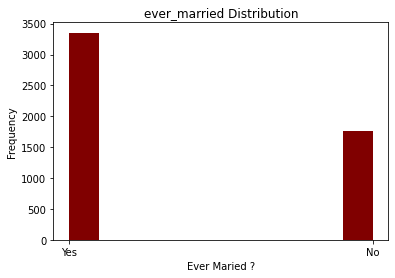

In [10]:
# kolom ever_married juga merupakan kolom kategori,
# kita ingin melihat distribusi pada kolom ini
print(data.ever_married.value_counts())
plt.hist(data.ever_married,color='maroon')
plt.title('ever_married Distribution')
plt.xlabel('Ever Maried ?')
plt.ylabel('Frequency')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64



<ipython-input-11-4939ffab06c4>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0.5, 0, 'Type of Work')

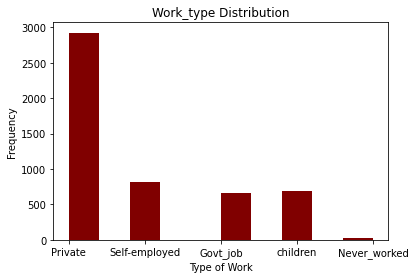

In [11]:
# kolom work_type juga merupakan kolom kategori
# kita akan melihat ada berapa kategori dalam kolom tersebut
print(data.work_type.value_counts())
# ada 5 kategori dalam kolom work_type, nanti akan kita ubah menjadi label untuk analisa
plt.hist(x= data.work_type,color='maroon')
plt.title('Work_type Distribution')
plt.ylabel('Frequency')
plt.xlabel('Type of Work')

Urban    2596
Rural    2514
dtype: int64



<ipython-input-12-6aac3139cf19>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Frequency')

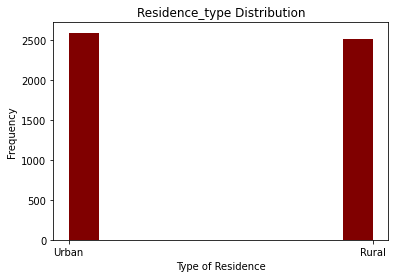

In [12]:
# kolom Residence_type juga merupakan kolom kategori
# kita ingin melihat distribusi dari value 
print(data.Residence_type.value_counts())
plt.hist(x=data.Residence_type,color='maroon')
plt.title('Residence_type Distribution')
plt.xlabel('Type of Residence')
plt.ylabel('Frequency')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 0, 'Avg Glucose Level')

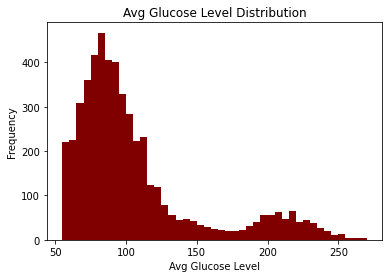

In [13]:
# kolom avg_glucose_level bertipe float sudah sesuai
# melihat EDA dari kolom
print(data.avg_glucose_level.describe())

# melihat distribusi dari kolom
bins_list = list(range(55,275,5))
plt.hist(x=data.avg_glucose_level, bins=bins_list,color='maroon')
plt.title('Avg Glucose Level Distribution')
plt.ylabel('Frequency')
plt.xlabel('Avg Glucose Level')

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0, 0.5, 'Frequency')

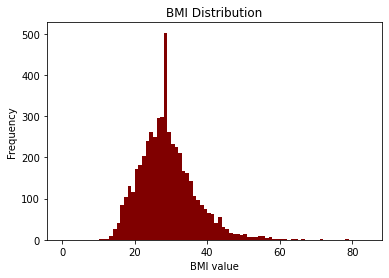

In [14]:
# kolom bmi bertipe float juga, terdapat missing value pada kolom
# melihat EDA dari kolom bmi
print(data.bmi.describe())
# mengisi missing value dengan mean dari kolom bmi
data.bmi = data.bmi.fillna(data.bmi.mean())
# melihat distribusi dari kolom bmi
plt.hist(data.bmi, bins=bin_list,color='maroon')
bin_list=list(range(10,100,1))
plt.title('BMI Distribution')
plt.xlabel('BMI value')
plt.ylabel('Frequency')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64



<ipython-input-15-78666ed562b7>:3: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0.5, 0, 'Smoking Status')

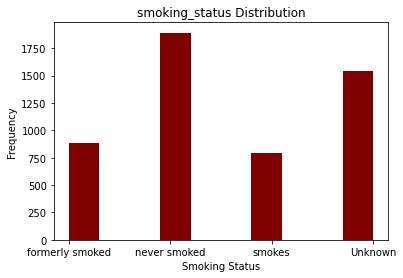

In [15]:
# kolom smoking_status adalah kategori
# melihat unique value dari kolom smoking_status
print(data.smoking_status.value_counts())
plt.hist(data.smoking_status,histtype='barstacked',color='maroon')
plt.title('smoking_status Distribution')
plt.ylabel('Frequency')
plt.xlabel('Smoking Status')


No     4861
Yes     249
dtype: int64



<ipython-input-16-0518dc2179d2>:4: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Text(0, 0.5, 'Stroke')

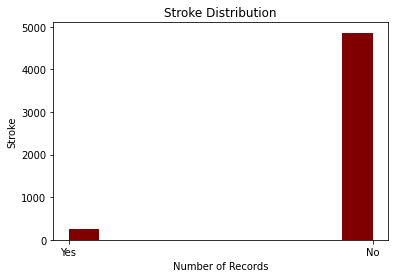

In [16]:
# kolom stroke merupakan kolom target yang akan kita prediksi
# melihat distribusi value kolom stroke
stroke = data.stroke.replace({0:'No',1:'Yes'})
print(stroke.value_counts())
# data imblance karena nilai 0 atau tidak stroke jauh lebih besar dari nilai 1 atau stroke
plt.hist(x=stroke,color='maroon')
plt.title('Stroke Distribution')
plt.xlabel('Number of Records')
plt.ylabel('Stroke')

In [17]:
# melihat apakah masih ada missing values
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Setelah di cek satu persatu kolom dataset kita sudah bersih dari missing value dan tidak ada salah input atau miss interpretasi

## 2.2 Data Exploration

Pada bagian ini kita akan melakukan ekslorasi pada dataset, kolom - kolom, dan visualisasi insight yang ada pada dataset ini.

### 2.2.1 Hypertension

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


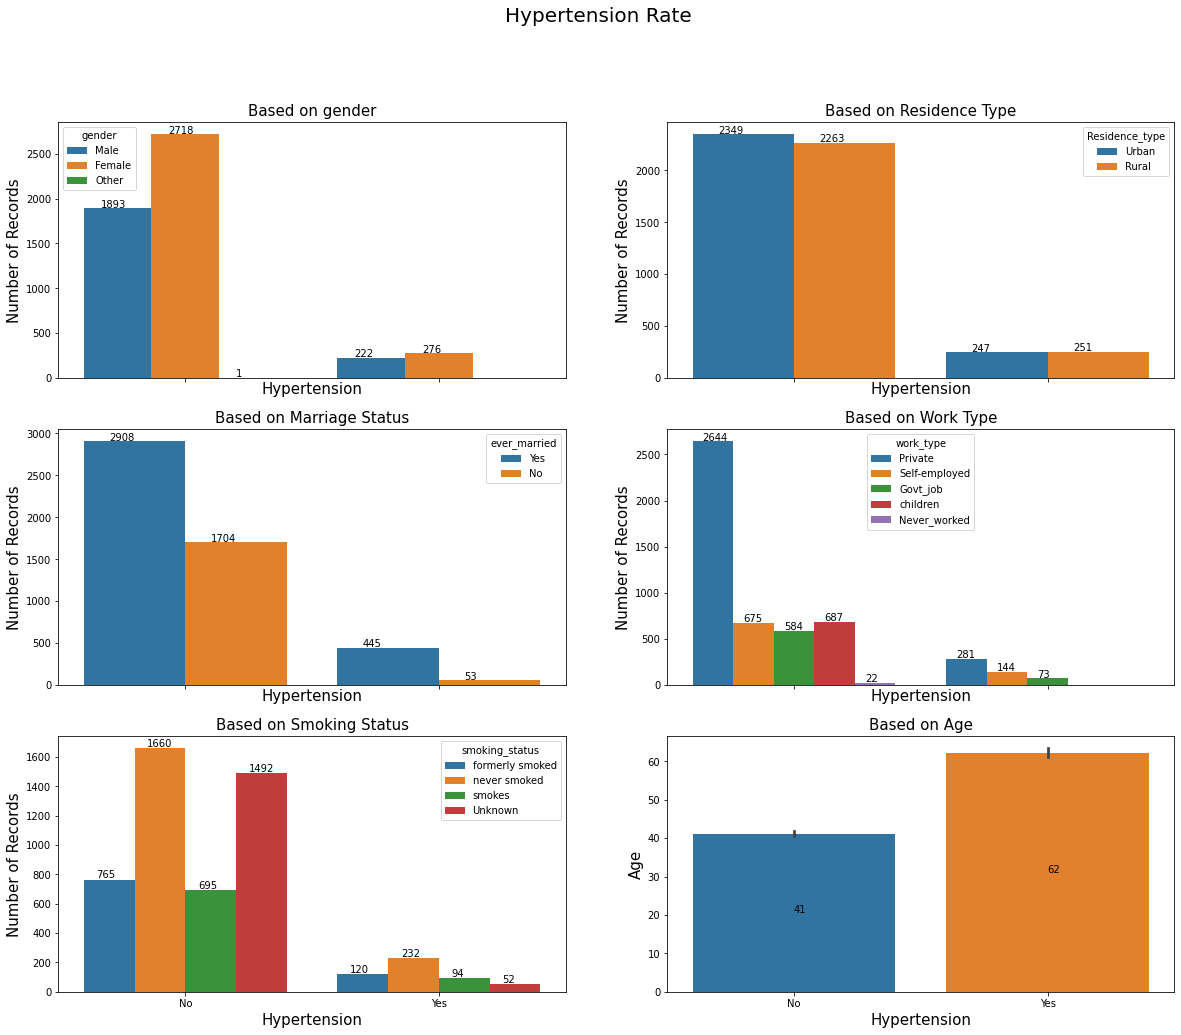

In [18]:
# kita akan mencari insight dari data hipertensi terhadap kolom kolom lain di data set ini
# pertama saya akan duplikat dataset agar dataset original tidak terganggu
data_vis = data.copy()
data_vis.hypertension = data_vis.hypertension.replace({0:'No',1:'Yes'})

# membuat figure dari 6 plot 
fig, axes = plt.subplots(3, 2, figsize=(20,16), sharey=False,sharex=True)
fig.suptitle('Hypertension Rate',fontsize=20)

# Hypertension Based on Gender
sns.countplot(ax=axes[0,0], data=data_vis, x='hypertension', hue='gender',)
axes[0,0].set_title('Based on gender',fontsize=15)
axes[0,0].set_xlabel('Hypertension',fontsize=15)
axes[0,0].set_ylabel('Number of Records',fontsize=15)
for i in axes[0,0].patches:
   axes[0,0].text(i.get_x() + i.get_width()/4, i.get_height() + 10, "%.0f" % i.get_height())

# Hypertension Based on Residence Type
sns.countplot(ax=axes[0,1], data=data_vis,x='hypertension',hue='Residence_type')
axes[0,1].set_title('Based on Residence Type',fontsize=15)
axes[0,1].set_xlabel('Hypertension',fontsize=15)
axes[0,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertension Based on Marriage Status
sns.countplot(ax=axes[1,0], data=data_vis,x='hypertension',hue='ever_married')
axes[1,0].set_title('Based on Marriage Status',fontsize=15)
axes[1,0].set_xlabel('Hypertension',fontsize=15)
axes[1,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertension Based on Work Type
sns.countplot(ax=axes[1,1], data=data_vis,x='hypertension',hue='work_type')
axes[1,1].set_title('Based on Work Type',fontsize=15)
axes[1,1].set_xlabel('Hypertension',fontsize=15)
axes[1,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertension Based on Smoking Status
sns.countplot(ax=axes[2,0], data=data_vis,x='hypertension',hue='smoking_status')
axes[2,0].set_title('Based on Smoking Status',fontsize=15)
axes[2,0].set_xlabel('Hypertension',fontsize=15)
axes[2,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[2,0].patches:
   axes[2,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# Hypertensi Based on age
sns.barplot(data=data_vis,y='age',x='hypertension',ax=axes[2,1])
axes[2,1].set_title('Based on Age',fontsize=15)
axes[2,1].set_xlabel('Hypertension',fontsize=15)
axes[2,1].set_ylabel('Age',fontsize=15)
for  x in axes[2,1].patches:
   axes[2,1].text( x.get_x() +  x.get_width()/2,  x.get_height()/2, "%.0f" % x.get_height())



Dari Grafik Hypertension Rate di atas dapat disimpulkan bahwa :
1. lebih banyak pasien yang tidak memiliki hipertensi daripada yang memiliki (imbalance).
2. berdasarkan gender presentase female lebih banyak dari pada male dalam kondisi memiliki hipertensi maupun tidak.
3. berdasarkan residence type pasien yang tinggal di rural area memiliki potensi mengidap hipertensi lebih besar. 
4. berdasarkan status pernikahan pasien yang pernah menikah memiliki potensi  mengidap hipertensi lebih besar 
5. berdasrkan tipe pekerjaan pasien yang bekerja di sektor swasta (private) memiliki potensi mengidap hipertensi lebih besar
6. berdasarkan kondisi merokok, pasien yang tidak pernah merokok memiliki potensi mengidap hipertensi yang lebih besar.
7. berdasarkan kondisi umur, pasien dengan umur di atas 41 tahun memiliki potensi mengidap hipertensi lebih besar.


### 2.2.2 Heart Disease

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


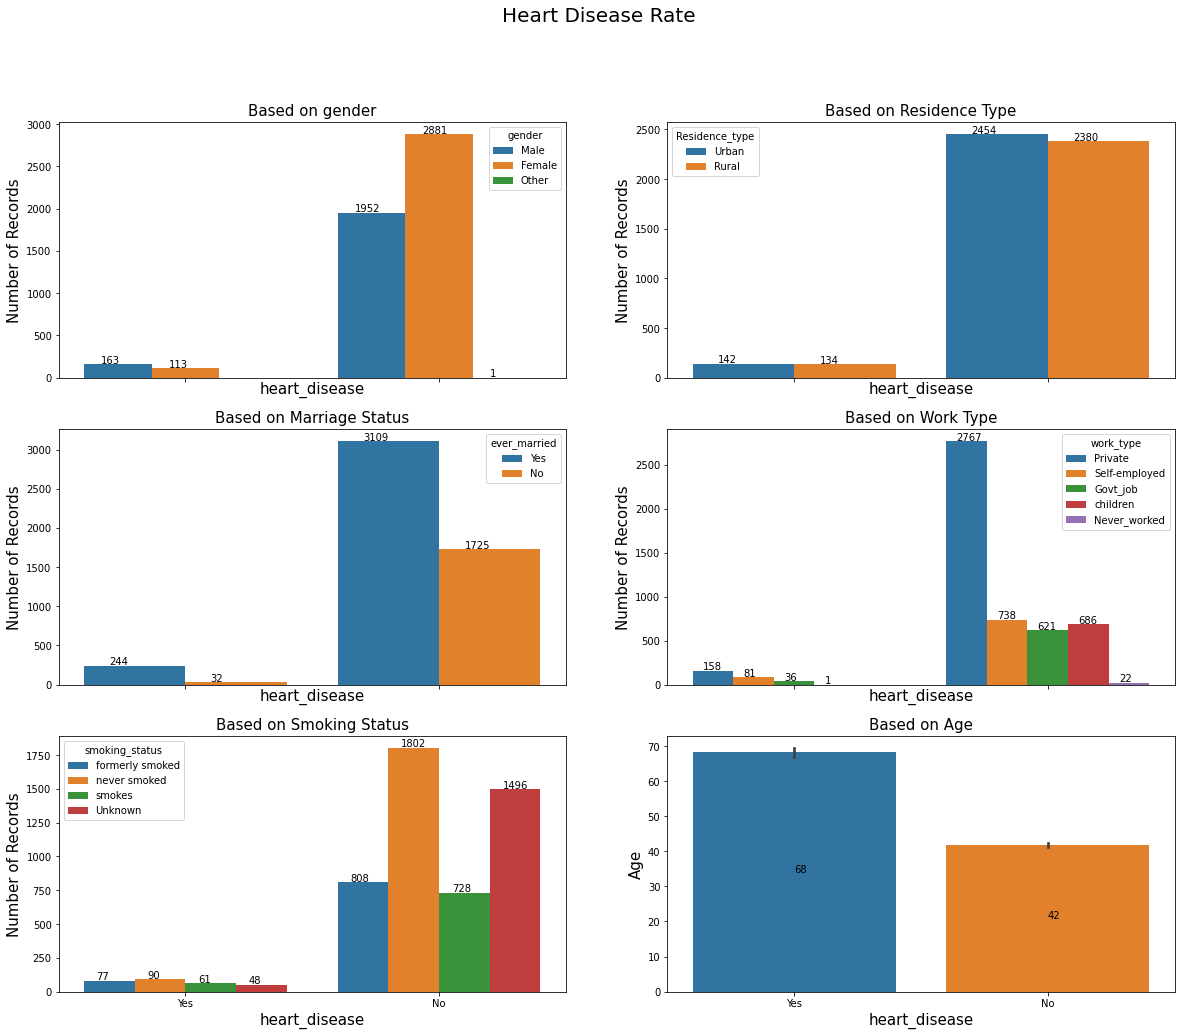

In [19]:
# kita akan mencari insight dari kolom heart disease terhadap kolom kolom lain di data set ini
# agar lebih mudah dipahami saya akan mengganti nilai 0 menjadi No 
# dan 1 menjadi Yes pada kolom heart disease
data_vis.heart_disease = data_vis.heart_disease.replace({0:'No',1:'Yes'})

# membuat figure dengan 6 plot
fig, axes = plt.subplots(3, 2, figsize=(20,16), sharey=False,sharex=True)
fig.suptitle('Heart Disease Rate',fontsize=20)

# heart_disease Based on Gender
sns.countplot(ax=axes[0,0], data=data_vis, x='heart_disease', hue='gender',)
axes[0,0].set_title('Based on gender',fontsize=15)
axes[0,0].set_xlabel('heart_disease',fontsize=15)
axes[0,0].set_ylabel('Number of Records',fontsize=15)
for i in axes[0,0].patches:
   axes[0,0].text(i.get_x() + i.get_width()/4, i.get_height() + 10, "%.0f" % i.get_height())

# heart_disease Based on Residence Type
sns.countplot(ax=axes[0,1], data=data_vis,x='heart_disease',hue='Residence_type')
axes[0,1].set_title('Based on Residence Type',fontsize=15)
axes[0,1].set_xlabel('heart_disease',fontsize=15)
axes[0,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# heart_disease Based on Marriage Status
sns.countplot(ax=axes[1,0], data=data_vis,x='heart_disease',hue='ever_married')
axes[1,0].set_title('Based on Marriage Status',fontsize=15)
axes[1,0].set_xlabel('heart_disease',fontsize=15)
axes[1,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# heart_disease Based on Work Type
sns.countplot(ax=axes[1,1], data=data_vis,x='heart_disease',hue='work_type')
axes[1,1].set_title('Based on Work Type',fontsize=15)
axes[1,1].set_xlabel('heart_disease',fontsize=15)
axes[1,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# heart_disease Based on Smoking Status
sns.countplot(ax=axes[2,0], data=data_vis,x='heart_disease',hue='smoking_status')
axes[2,0].set_title('Based on Smoking Status',fontsize=15)
axes[2,0].set_xlabel('heart_disease',fontsize=15)
axes[2,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[2,0].patches:
   axes[2,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

#heart_disease Based on age
sns.barplot(data=data_vis,y='age',x='heart_disease',ax=axes[2,1])
axes[2,1].set_title('Based on Age',fontsize=15)
axes[2,1].set_xlabel('heart_disease',fontsize=15)
axes[2,1].set_ylabel('Age',fontsize=15)
for  x in axes[2,1].patches:
   axes[2,1].text( x.get_x() +  x.get_width()/2,  x.get_height()/2, "%.0f" % x.get_height())



Dari Grafik Heart Disease Rate di atas dapat disimpulkan bahwa :
1. lebih banyak pasien yang tidak memiliki heart disease daripada yang memiliki (imbalance).
2. berdasarkan gender, pasien laki - laki memiliki potensi mengidap heart disease lebih besar.
3. berdasarkan residence type pasien yang tinggal di urban area atau pun rural memiliki potensi mengidap heart disease yang hampir sama. 
4. berdasarkan status pernikahan pasien yang pernah menikah memiliki potensi  mengidap heart disease lebih besar 
5. berdasrkan tipe pekerjaan pasien yang bekerja di sektor swasta (private) memiliki potensi mengidap heart disease lebih besar
6. berdasarkan kondisi merokok, pasien yang tidak pernah merokok memiliki potensi mengidap heart disease yang lebih besar.
7. berdasarkan kondisi umur, pasien dengan umur di atas 42 tahun memiliki potensi mengidap heart disease lebih besar.


### 2.2.3 Stroke

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


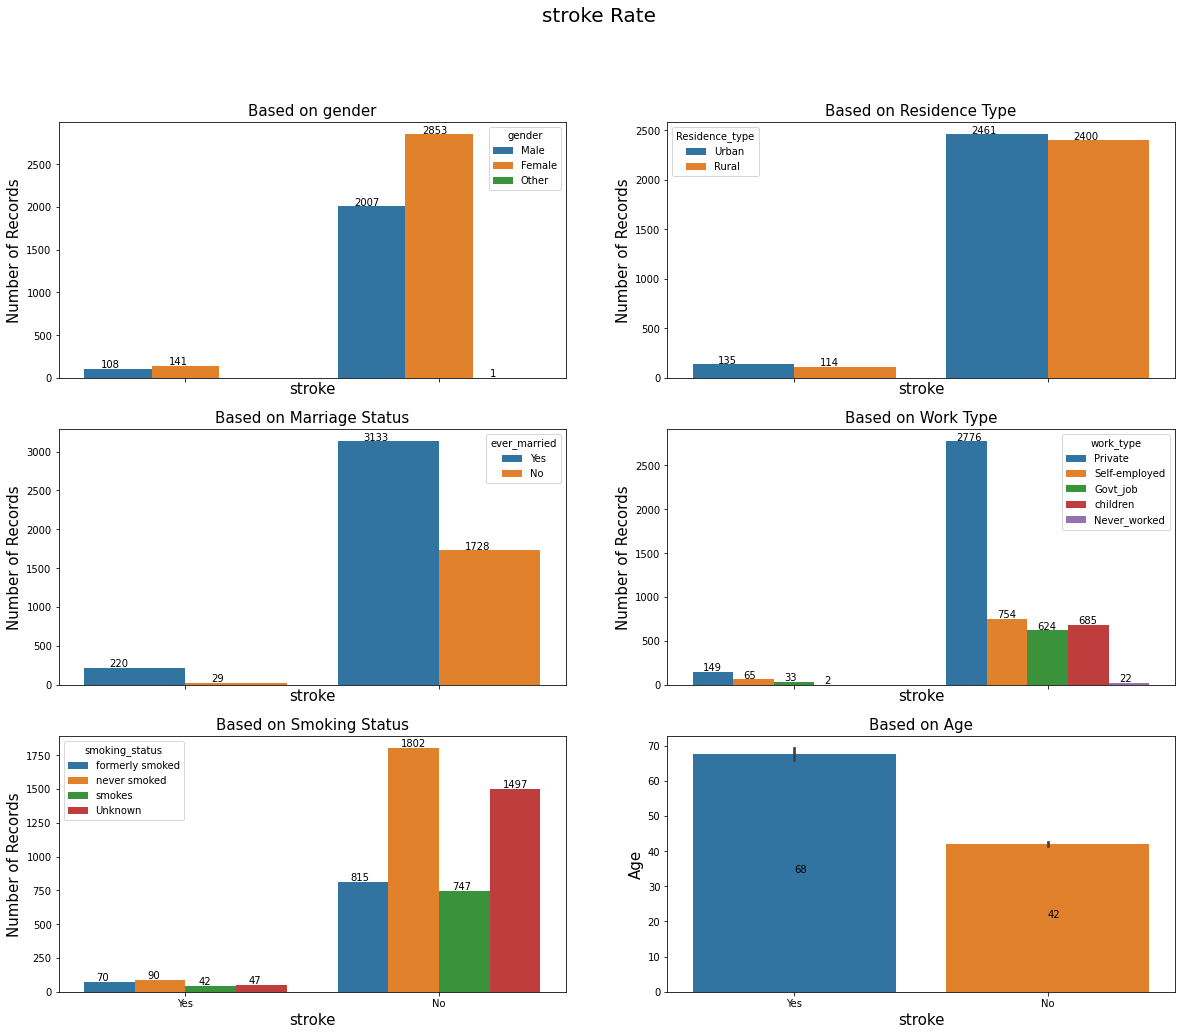

In [20]:
# kita akan mencari insight dari kolom stroke terhadap kolom kolom lain di data set ini
# agar lebih mudah dipahami saya akan mengganti nilai 0 menjadi No 
# dan 1 menjadi Yes pada kolom heart disease
data_vis.stroke = data_vis.stroke.replace({0:'No',1:'Yes'})
fig, axes = plt.subplots(3, 2, figsize=(20,16), sharey=False,sharex=True)
fig.suptitle('stroke Rate',fontsize=20)

# stroke Based on Gender
sns.countplot(ax=axes[0,0], data=data_vis, x='stroke', hue='gender',)
axes[0,0].set_title('Based on gender',fontsize=15)
axes[0,0].set_xlabel('stroke',fontsize=15)
axes[0,0].set_ylabel('Number of Records',fontsize=15)
for i in axes[0,0].patches:
   axes[0,0].text(i.get_x() + i.get_width()/4, i.get_height() + 10, "%.0f" % i.get_height())

# stroke Based on Residence Type
sns.countplot(ax=axes[0,1], data=data_vis,x='stroke',hue='Residence_type')
axes[0,1].set_title('Based on Residence Type',fontsize=15)
axes[0,1].set_xlabel('stroke',fontsize=15)
axes[0,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# stroke Based on Marriage Status
sns.countplot(ax=axes[1,0], data=data_vis,x='stroke',hue='ever_married')
axes[1,0].set_title('Based on Marriage Status',fontsize=15)
axes[1,0].set_xlabel('stroke',fontsize=15)
axes[1,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# stroke Based on Work Type
sns.countplot(ax=axes[1,1], data=data_vis,x='stroke',hue='work_type')
axes[1,1].set_title('Based on Work Type',fontsize=15)
axes[1,1].set_xlabel('stroke',fontsize=15)
axes[1,1].set_ylabel('Number of Records',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

# stroke Based on Smoking Status
sns.countplot(ax=axes[2,0], data=data_vis,x='stroke',hue='smoking_status')
axes[2,0].set_title('Based on Smoking Status',fontsize=15)
axes[2,0].set_xlabel('stroke',fontsize=15)
axes[2,0].set_ylabel('Number of Records',fontsize=15)
for  x in axes[2,0].patches:
   axes[2,0].text( x.get_x() +  x.get_width()/4,  x.get_height() + 10, "%.0f" % x.get_height())

#stroke Based on age
sns.barplot(data=data_vis,y='age',x='stroke',ax=axes[2,1])
axes[2,1].set_title('Based on Age',fontsize=15)
axes[2,1].set_xlabel('stroke',fontsize=15)
axes[2,1].set_ylabel('Age',fontsize=15)
for  x in axes[2,1].patches:
   axes[2,1].text( x.get_x() +  x.get_width()/2,  x.get_height()/2, "%.0f" % x.get_height())



Secara garis besar grafik stroke similar seperti grafik heart disease dan hypertension sebelumnya, ini menunjukan bahwa kolom stroke, heart disease dan hipertensi memiliki korelasi yang hampir sama.


In [21]:
# kita akan mengecek korelasi dari ketiga kolom tersebut
data[['stroke','hypertension','heart_disease']].corr()

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,stroke,hypertension,heart_disease
stroke,1.000000,0.127904,0.134914
hypertension,0.127904,1.000000,0.108306
heart_disease,0.134914,0.108306,1.000000


Ternyata korelasi antar kolom stroke, hypertension, dan heart_disease tidak signifikan, mungkin ini dikarenakan dataset yang imbalance dan cenderung pasien yang memiliki penyakit lebih sedikit dari pasien yang tidak memiliki.

### 2.2.4 Average Glucose Level

Text(0, 0.5, 'Age')

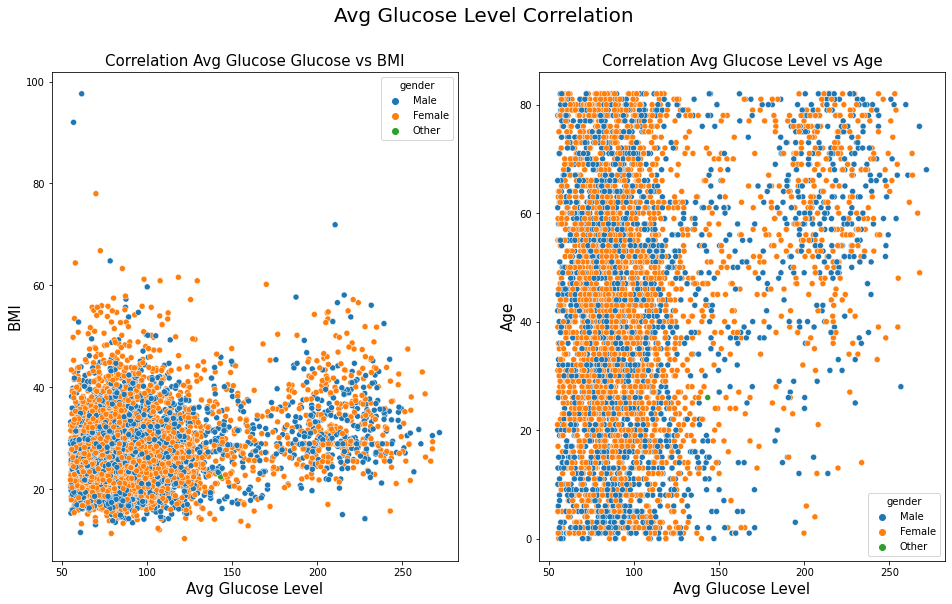

In [22]:
# kita akan mencari insight dari kolom avg glucose level terhadap kolom kolom lain di data set ini
fig, axes = plt.subplots(1, 2, figsize=(16,9), sharey=False,sharex=False)
fig.suptitle('Avg Glucose Level Correlation',fontsize=20)

# Correlation between avg_glucose_level and bmi
sns.scatterplot(data=data_vis,x='avg_glucose_level',y='bmi',hue='gender',ax=axes[0])
axes[0].set_title('Correlation Avg Glucose Glucose vs BMI',fontsize=15)
axes[0].set_ylabel('BMI',fontsize=15)
axes[0].set_xlabel('Avg Glucose Level',fontsize=15)

# correlation betewwn avg glucose level and age
sns.scatterplot(data=data_vis,x='avg_glucose_level',y='age',hue='gender',ax=axes[1])
axes[1].set_xlabel('Avg Glucose Level',fontsize=15)
axes[1].set_title('Correlation Avg Glucose Level vs Age',fontsize=15)
axes[1].set_ylabel('Age',fontsize=15)

In [23]:
# karena grafik tidak menunjukan korelasi 
# saya akan mengecek korelasi nya menggunakan metode pearson
data[['avg_glucose_level','bmi','age']].corr('pearson')['avg_glucose_level']

avg_glucose_level    1.000000
bmi                  0.168751
age                  0.238179
Name: avg_glucose_level, dtype: float64


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


Dapat dilihat di grafik tersebut bahwa antar kolom glukosa, bmi dan age tidak memiliki korelasi yang signifikan, kita buktikan dengan tabel korelasi di atas bahwa korelasinya 0,17 dan 0,24.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


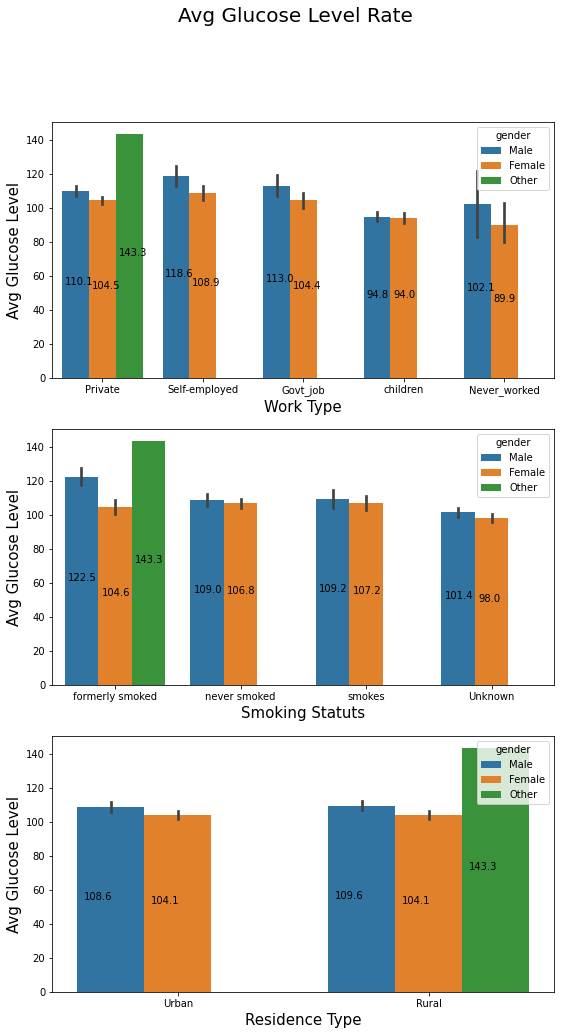

In [24]:
# membuat figure untuk membandingkan 3 plot
fig, axes = plt.subplots(3, 1, figsize=(9,16), sharey=True,sharex=False)
fig.suptitle('Avg Glucose Level Rate',fontsize=20)

# barplot avg glucose level based on Work type and gender
sns.barplot( data=data_vis,y='avg_glucose_level',x='work_type',hue='gender',ax=axes[0])
axes[0].set_ylabel('Avg Glucose Level',fontsize=15)
axes[0].set_xlabel('Work Type',fontsize=15)
for  x in axes[0].patches:
   axes[0].text( x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.1f" % x.get_height())

# barplot avg glucose level Based on Smoking Status and gender
sns.barplot(ax=axes[1], data=data_vis,y='avg_glucose_level',x='smoking_status',hue='gender')
axes[1].set_xlabel('Smoking Statuts',fontsize=15)
axes[1].set_ylabel('Avg Glucose Level',fontsize=15)
for  x in axes[1].patches:
   axes[1].text( x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.1f" % x.get_height())

# barplot avg glucose level Based on Residence Type
sns.barplot(data=data_vis,y='avg_glucose_level',x='Residence_type',ax=axes[2],hue='gender')
axes[2].set_xlabel('Residence Type',fontsize=15)
axes[2].set_ylabel('Avg Glucose Level',fontsize=15)
for  x in axes[2].patches:
   axes[2].text( x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.1f" % x.get_height())



berdasarkan grafik di atas, dapat diketahui bahwa :
1. Pria cenderung memiliki kadar avg glucose level yang lebih tinggi dari pada perempuan.
2. Pria yang maupun perempuan dengan tipe Pekerjaan Self-employed memiliki kadar avg glucose level yang lebih tinggi dari pada tipe pekerjaan lain.
3. Pria yang sudah berhenti merokok memiliki kadar avg glucose lebih tinggi dari pria lain, sedangkan peremuan yang merokok memiliki kadar avg glucose yang lebih tinggi dari perempuan yang lain.
4. Pria maupun perempuan yang tinggal di area urban maupun rural memiliki kadar glukosa yang hampir sama. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


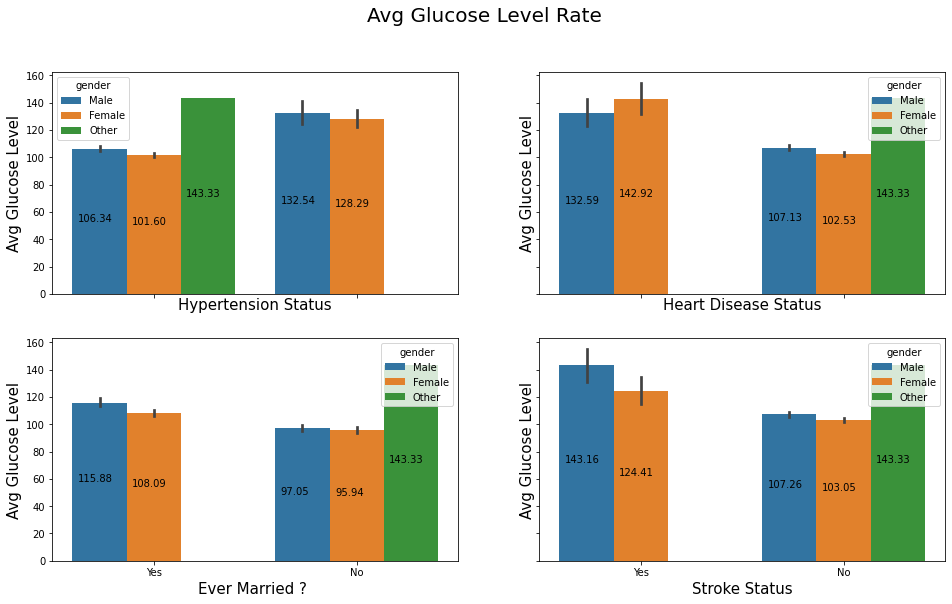

In [25]:
# membuat figure dengan 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16,9), sharey=True,sharex=True)
fig.suptitle('Avg Glucose Level Rate',fontsize=20)
# avg glucose level based on hypertension status
sns.barplot( data=data_vis,y='avg_glucose_level',x='hypertension',hue='gender',ax=axes[0,0])
axes[0,0].set_ylabel('Avg Glucose Level',fontsize=15)
axes[0,0].set_xlabel('Hypertension Status',fontsize=15)
for  x in axes[0,0].patches:
   axes[0,0].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

# avg glucose level Based on heart disease status
sns.barplot(ax=axes[0,1], data=data_vis,y='avg_glucose_level', x='heart_disease',hue='gender')
axes[0,1].set_ylabel('Avg Glucose Level',fontsize=15)
axes[0,1].set_xlabel('Heart Disease Status',fontsize=15)
for  x in axes[0,1].patches:
   axes[0,1].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

#avg glucose level Based on Marriage Status
sns.barplot(data=data_vis,y='avg_glucose_level',x='ever_married',ax=axes[1,0],hue='gender')
axes[1,0].set_ylabel('Avg Glucose Level',fontsize=15)
axes[1,0].set_xlabel('Ever Married ? ',fontsize=15)
for  x in axes[1,0].patches:
   axes[1,0].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

#avg glucose level Based on Stroke Status
sns.barplot(data=data_vis,y='avg_glucose_level',x='stroke',ax=axes[1,1],hue='gender')
axes[1,1].set_ylabel('Avg Glucose Level',fontsize=15)
axes[1,1].set_xlabel('Stroke Status',fontsize=15)
for  x in axes[1,1].patches:
   axes[1,1].text(x.get_x() +  x.get_width()/10,  x.get_height()/2, "%.2f" % x.get_height())

Dari grafik di atas dapat diketahui bahwa :
1. Pria cenderung memiliki kadar avg glucose level yang lebih tinggi dari pada perempuan.
2. Pasien (Pria maupun perempuan) yang tidak memiliki hipertensi memiliki kadar avg glukosa yang lebih tinggi dari pada yang memiliki hipertensi.
3. Pasien (pria maupun perempuan) yang memiliki penyakit jantung memiiki kadar avg glukosa yang lebih tinggi dari pada yang tidak memiliki penyakit jantung.
4. Pasien yang pernah menikah memiliki kadar glukosa yang lebih tinggi dari pada yang belum menikah.
5. pasien yang mempunyai stroke memiliki kadar glukosa yang lebih tinggi dari pada yang tidak mempunyai stroke.

## 2.3 Handling Outliers

Apabila dirasa sudah cukup insight yang didapat dari dataset, saya akan melanjutkan ke tahap selanjutnya yaitu handling outliers. saya akan mengecek outliers tiap kolom, namun perlu hati - hati karena bisa saja outliers tersebut salah input atau memang dia anomali.
seperti repository sebelumnya saya akan menggunakan Inter Quartile Range (IQR) untuk menangani outliers. Q1 = 25 % dan Q3 75 %

In [43]:
# saya akan membuat class outliers dan mendefinisikan fungsi untuk menentukan limit 
# dan mencari data dalam limit tersebut
class outliers():
    # membuat fungsi limit dengan parameter kolom dari dataset
    def limit(self,i):
        self.Q1 = data[i].quantile(0.25)
        self.Q3 = data[i].quantile(0.75)
        self.IQR = self.Q3 - self.Q1
        # saya akan membuat limit extreme dari Q1 dan Q3
        self.lower = data[i].quantile(0.25) - (self.IQR*1.5)
        self.lower_extreme = data[i].quantile(0.25) - (self.IQR*3)
        self.upper = data[i].quantile(0.75) + (self.IQR*1.5)
        self.upper_extreme = data[i].quantile(0.75) + (self.IQR*3)
        print(f'Lower Limit = {self.lower}')
        print(f'Lower Extreme Limit = {self.lower_extreme}')
        print(f'Upper Limit = {self.upper}')
        print(f'Upper Extreme Limit = {self.upper_extreme}')
    # membuat fungsi untuk mengetahui berapa persen outliers pada dataset
    def percent_outliers(self,i):
        print(f'{data[(data[i] <= self.lower)].shape[0]/data[i].shape[0]*100} % of data whitin Lower Limit')
        print(f'{data[(data[i] <= self.lower_extreme)].shape[0]/data[i].shape[0]*100} % of data within Lower Extreme Limit')
        print(f'{data[(data[i] >= self.upper)].shape[0]/data[i].shape[0]*100} % of data within Upper Limit')
        print(f'{data[(data[i] >= self.upper_extreme)].shape[0]/data[i].shape[0]*100} % of data within Upper Extreme Limit')

Lower Limit = -29.0
Lower Extreme Limit = -83.0
Upper Limit = 115.0
Upper Extreme Limit = 169.0
None
0.0 % of data whitin Lower Limit
0.0 % of data within Lower Extreme Limit
0.0 % of data within Upper Limit
0.0 % of data within Upper Extreme Limit
None


Text(0.5, 0, 'Jumlah')

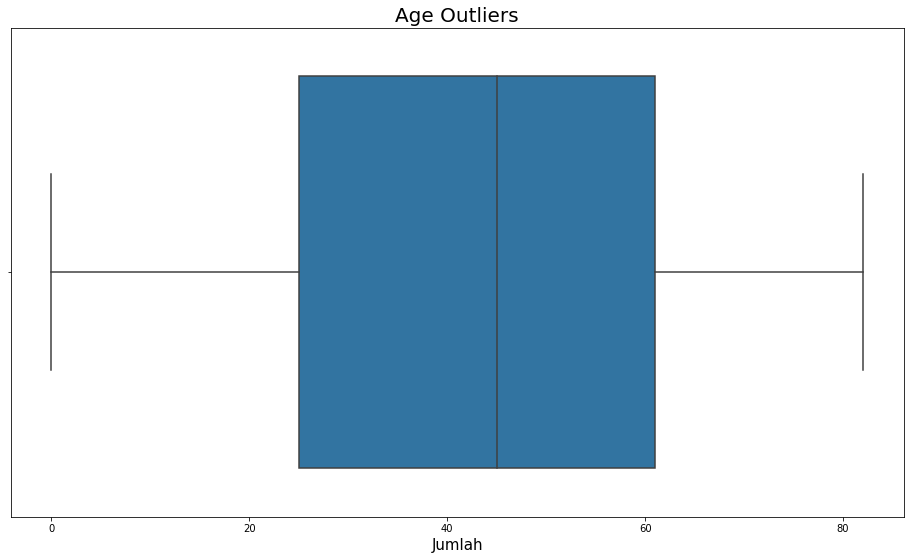

In [46]:
# saya akan mengecek limit dan persen limit pada kolom age
ol = outliers()
print(ol.limit('age'))
print('='*50)
print(ol.percent_outliers('age'))

# membuat boxplot kolom age untuk melakukan pengecekan pada outliers
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=data, x='age')
plt.title('Age Outliers',fontsize=20)
plt.xlabel('Jumlah', fontsize=15)

berdasarkan fungsi dan grafik tidak ada outliers pada kolom ini

Lower Limit = 21.977500000000006
Lower Extreme Limit = -33.28999999999999
Upper Limit = 169.35750000000002
Upper Extreme Limit = 224.625
None
0.0 % of data whitin Lower Limit
0.0 % of data within Lower Extreme Limit
12.270058708414872 % of data within Upper Limit
3.24853228962818 % of data within Upper Extreme Limit
None


Text(0.5, 0, 'Jumlah')

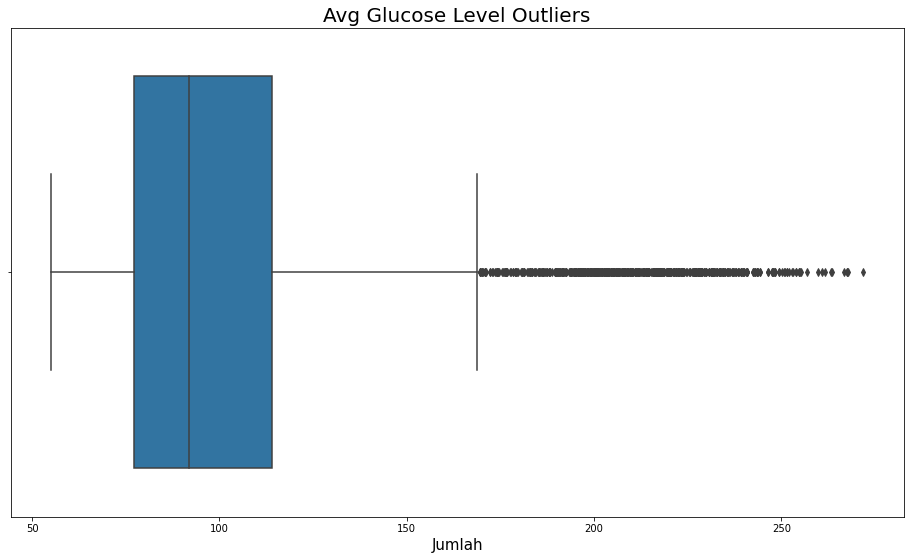

In [47]:
# saya akan mengecek limit dan persen outliers dari kolom avg_glucose_level
print(ol.limit('avg_glucose_level'))
print('='*50)
print(ol.percent_outliers('avg_glucose_level'))

# mengecek outliers dengan boxplot
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=data,x='avg_glucose_level')
plt.title('Avg Glucose Level Outliers', fontsize=20)
plt.xlabel('Jumlah',fontsize=15)

In [ ]:
# karena terdapat 